In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
names_clas = ['Edad','Clase de trabajo','Id','Eduacion','Educacion numero','Estado Civil','Ocupacion','relación','Raza','Sexo','Capital ganado','Capital perdido','Horas por semana','Pais nativo','Salario']
datos = pd.read_excel('Salario.xlsx', names=names_clas)
df = pd.DataFrame(datos)
df

,Edad,Clase de trabajo,Id,Eduacion,Educacion numero,Estado Civil,Ocupacion,relación,Raza,Sexo,Capital ganado,Capital perdido,Horas por semana,Pais nativo,Salario
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Edad              32560 non-null  int64 
 1   Clase de trabajo  32560 non-null  object
 2   Id                32560 non-null  int64 
 3   Eduacion          32560 non-null  object
 4   Educacion numero  32560 non-null  int64 
 5   Estado Civil      32560 non-null  object
 6   Ocupacion         32560 non-null  object
 7   relación          32560 non-null  object
 8   Raza              32560 non-null  object
 9   Sexo              32560 non-null  object
 10  Capital ganado    32560 non-null  int64 
 11  Capital perdido   32560 non-null  int64 
 12  Horas por semana  32560 non-null  int64 
 13  Pais nativo       32560 non-null  object
 14  Salario           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [97]:
df.describe()

,Edad,Id,Educacion numero,Capital ganado,Capital perdido,Horas por semana
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [98]:
## BORAMOS COLUMNAS INNECESARIAS
df = df.drop(['Id','relación','Educacion numero'], axis=1)
df.head(2)

,Edad,Clase de trabajo,Eduacion,Estado Civil,Ocupacion,Raza,Sexo,Capital ganado,Capital perdido,Horas por semana,Pais nativo,Salario
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K


In [99]:
## OBSERVAMOS DATOS FALTANTES 
df.isnull().sum()
## AUNQUE AQUI NO SALEN VALORES FALTANTES DEBEMOS REGISTRAR SI EXISTEN SIGNOS O CASILLAS CON ELEMENTOS NO OPTIMOS
## EN ESTE CASO SE MANEJA EL VALOR '?'

Edad                0
Clase de trabajo    0
Eduacion            0
Estado Civil        0
Ocupacion           0
Raza                0
Sexo                0
Capital ganado      0
Capital perdido     0
Horas por semana    0
Pais nativo         0
Salario             0
dtype: int64

In [100]:
df = df.replace(' ?',np.nan)
df.isnull().sum()

Edad                   0
Clase de trabajo    1836
Eduacion               0
Estado Civil           0
Ocupacion           1843
Raza                   0
Sexo                   0
Capital ganado         0
Capital perdido        0
Horas por semana       0
Pais nativo          583
Salario                0
dtype: int64

In [101]:
## RENELLAMOS LOS VALORES FALTANTES
df['Clase de trabajo'] = df['Clase de trabajo'].fillna(method='ffill')
df['Ocupacion'] = df['Ocupacion'].interpolate()

In [102]:
## YA QUE EL VALOR DE PAIS NATIVO ES IMPORTANTE SE DECIDE ELIMINAR ANTES QUE REEMPLAZARLO YA QUE AFECTARIA AL ESTUDIO
df = df.dropna(axis=0)
df.shape

(30161, 12)

In [103]:
## YA CON LOS DATOS LIMPIOS Y SIN DATOS FALTANTES VAMOS A VOLVER VARIABLE NUMERICA LAS COLUMNAS 
#1) Para la edad fraccionaremos en grupos 1=Niño, 2=Adolecente, 3=Adulto, 4='Tercera edad'
bins = [0,10,20,50,100]
labels = ['1','2','3','4']
df['Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels)
df

,Edad,Clase de trabajo,Eduacion,Estado Civil,Ocupacion,Raza,Sexo,Capital ganado,Capital perdido,Horas por semana,Pais nativo,Salario
0,3,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
1,3,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
2,4,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
3,3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K
4,3,Private,Masters,Married-civ-spouse,Exec-managerial,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3,Private,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,<=50K
32556,3,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,>50K
32557,4,Private,HS-grad,Widowed,Adm-clerical,White,Female,0,0,40,United-States,<=50K
32558,3,Private,HS-grad,Never-married,Adm-clerical,White,Male,0,0,20,United-States,<=50K


In [104]:
## OBSERVAMOS TODOS LOS VALORES UNICOS QUE TIENEN LAS COLUMNAS
print('Valores unicos de Clase de trabajo :', df['Clase de trabajo'].unique())
print('Valores unicos de Eduacion :', df['Eduacion'].unique())
print('Valores unicos de Estado Civil :', df['Estado Civil'].unique())
print('Valores unicos de Ocupacion :', df['Ocupacion'].unique())
print('Valores unicos de Raza :', df['Raza'].unique())
print('Valores unicos de Pais nativo :', df['Pais nativo'].unique())
print('Valores unicos de Salario :', df['Salario'].unique())

Valores unicos de Clase de trabajo : [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
Valores unicos de Eduacion : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
Valores unicos de Estado Civil : [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Valores unicos de Ocupacion : [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' Craft-repair'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Valores unicos de Raza : [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
Valores unicos de Pais nativo : [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 '

In [105]:
## CAMBIO A VARIABLE DUMMIES
df = pd.get_dummies(df, columns=['Clase de trabajo','Eduacion','Estado Civil','Ocupacion','Raza','Pais nativo','Sexo','Salario'], drop_first=True)
df.rename(columns={'Salario_ >50K': 'Salario2'}, inplace=True)
df

,Edad,Capital ganado,Capital perdido,Horas por semana,Clase de trabajo_ Local-gov,Clase de trabajo_ Private,Clase de trabajo_ Self-emp-inc,Clase de trabajo_ Self-emp-not-inc,Clase de trabajo_ State-gov,Clase de trabajo_ Without-pay,...,Pais nativo_ Scotland,Pais nativo_ South,Pais nativo_ Taiwan,Pais nativo_ Thailand,Pais nativo_ Trinadad&Tobago,Pais nativo_ United-States,Pais nativo_ Vietnam,Pais nativo_ Yugoslavia,Sexo_ Male,Salario2
0,3,0,0,13,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,3,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,4,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,3,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3,0,0,38,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
32556,3,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
32557,4,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
32558,3,0,0,20,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


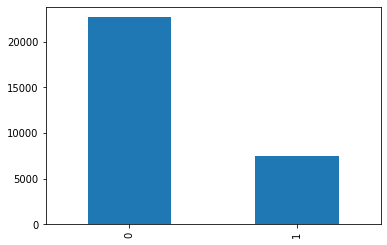

In [106]:
## VERIFICAMOS LOS DATOS DEL SALARIO PARA OBSERVAR ALGUN DESBALANCE
df['Salario2'].value_counts().plot(kind='bar')
plt.show()

##PODEMOS OBSERVAR EL DESBALANCE HACIA LAS PERSONAS QUE GANAN MENOS DE 50K
## ESTO SE DEBE TENER EN CUENTA PARA LA CREACION DEL MODELO 

In [107]:
## CREAMOS EL MODELO 
X = df.iloc[:,0:89]
Y = df['Salario2']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20)
model = LogisticRegression(solver='lbfgs',max_iter=1000, class_weight='balanced', penalty='l2')
model.fit(X_train, Y_train)
Y_predic = model.predict(X_test)

In [108]:
### CALCULAMOS LAS METRICAS
model.score(X_train, Y_train)

0.800190649867374

In [109]:
##SE PUEDE EVIDENCIAR EL FALLO POR EL DESBALANCE DE LOS DATOS EN EL DATASETS
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(Y_predic, Y_test)
print(matriz)

[[3585  268]
 [ 922 1258]]


In [110]:
## OBSERVEMOS ESTO EN EL REDCALL
from sklearn.metrics import classification_report
report = classification_report(Y_predic, Y_test)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3853
           1       0.82      0.58      0.68      2180

    accuracy                           0.80      6033
   macro avg       0.81      0.75      0.77      6033
weighted avg       0.81      0.80      0.79      6033

